### 2021 Spring "EE479: Scientific Computing & Data"

#### Hyeonwoo Yeo (KAIST EE Yong-Hoon Kim Group) 

#### Kutz 9.6: Optimizing Computational Performance: Rules of Thumb

#### One-way wave equation

###### 2021. 05. 17 Revised from Kutz 9.6

###### To solve: One-way wave equation

(9.6.1a): $\frac{ \partial{u}}{ \partial{t}} = \frac{ \partial{u}}{ \partial{x}}$


##### General Algorithm:

For the first-derivative matrix,

(9.6.2):$\frac{ \partial{u}}{ \partial{x}} \rightarrow \frac{1}{2\Delta x}$ $\left[\begin{array}{rrr} 
0&1&0&\cdots&0&-1\\
-1&0&1&0&\cdots&0\\
0&\ddots&\ddots&\ddots\\
\vdots& & & & &\vdots\\
\vdots&\cdots&0&-1&0&1\\
1&0&\cdots&0&-1&0\\
\end{array}\right]$
$\left(\begin{array}{rrr} 
u_1\\
u_2\\
\vdots\\
u_n\\
\end{array}\right)$

Euler (unstable) (9.6.4a): $ u^{(m+1)}_{n} = u^{(m)}_{n}+\frac{\lambda}{2}(u^{(m)}_{n+1}-u^{(m)}_{n-1}) $ 

leap-frog (2,2) (stable for $\lambda \le 1$) (9.6.4b): $ u^{(m+1)}_{n} = u^{(m-1)}_{n}+\lambda(u^{(m)}_{n+1}-u^{(m)}_{n-1}) $

CFL = $ \lambda = \Delta t/\Delta x $

Analytic general solution 


(9.3.7 & 8) Euler: $|g(\zeta)| = \sqrt {1+\lambda^2 sin^2 \zeta h} \ge 1 \rightarrow \lim_{m\to\infty}|g|^m \rightarrow \infty $ unstable scheme


(9.3.20 & 21) leap-frog: $g - \frac{1}{g} = 2 i \lambda sin(\zeta h) \rightarrow $ conditionally stable $(\lambda \le 1) $ 

CFL = 0.5
[[ 0.  1.  0. ...  0.  0. -1.]
 [-1.  0.  1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ... -1.  0.  1.]
 [ 1.  0.  0. ...  0. -1.  0.]]
calculation time = 0.0010027885437011719


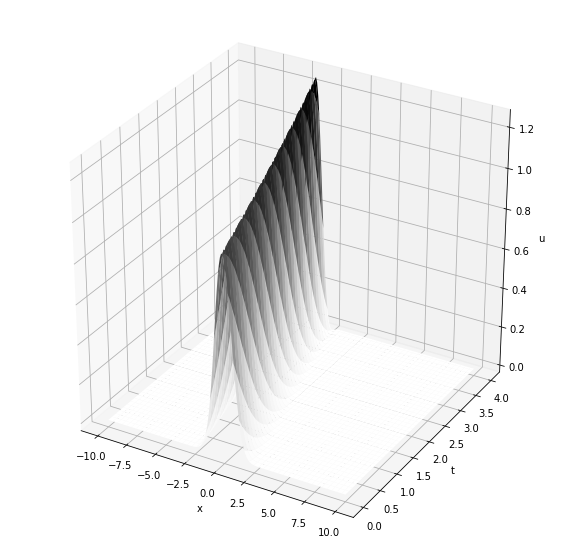

In [10]:
import numpy as np
import numpy.linalg as lin
from matplotlib import pyplot as plt
from scipy.sparse import spdiags, csr_matrix, lil_matrix
import time

# initialize grid size, time, and CFL number
Time=4
L=20
n=200
x2=np.linspace(-L/2,L/2,n)
dx=L/n
dt=0.05   #CFL = 0.5
#dt = 0.2  #CFL = 2  
CFL=dt/dx
print('CFL =' ,CFL)
time_steps=Time/dt
t=np.linspace(0,int(Time),int(time_steps))

x = []
for i in range(len(x2)):
    x.append(x2[i])
    
sol = []
u0 = np.exp(-np.square(x))
u1 = np.exp(-np.square(np.array(x)+dt))

sol.append(u0)
sol.append(u1)

####################  full matrix  ####################
#ddx = np.zeros((n, n))
#ddx[0, 1] = 1; ddx[0,n-1] = -1
#ddx[n-1, 0] = 1; ddx[n-1,n-2] = -1
#for i in range(1, n-1):
#    ddx[i, i-1] = -1
#    ddx[i, i] = 0
#    ddx[i, i+1] = 1

#print(ddx)
######################################################

################## sparse matrix #####################
a = np.ones(n)
a = np.negative(a)
b = np.ones(n)

data = np.array([a,b])
diags = np.array([-1,1])
ddx = spdiags(data, diags, n, n)
ddx = csr_matrix(ddx)
ddx[0,n-1] = -1; ddx[n-1,0] = 1

#print(ddx)
print(ddx.toarray())
#######################################################

start = time.time()

# leap frog (2,2) or euler iteration scheme
for j in range(1, int(time_steps-1)):
    u2 = u1 + 0.5*CFL*ddx.dot(u1)   #euler
    u1 = u2                         #euler
    
#    u2 = u0 + CFL*ddx.dot(u1)       #leap frog (2,2)
#    u0 = u1                         #leap frog (2,2)
#    u1 = u2                         #leap frog (2,2)
    
    sol.append(u2)
    
finish = time.time() - start
print('calculation time =' , finish)

from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

sol = np.array(sol)
A = np.reshape(sol,(int(time_steps),len(x)))

X,T = np.meshgrid(x,t)

surf = ax.plot_surface(X, T, sol, cmap='Greys')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

plt.show()
